## Neural Network Model Using Sequential API

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal, GlorotUniform
from tensorflow.keras.regularizers import l2
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Define the Sequential model
model_seq = Sequential()

# Add layers with detailed parameters
model_seq.add(Dense(512,
                    activation='relu',
                    input_shape=(784,),  # Assuming input features are 784 as in MNIST dataset
                    kernel_initializer=HeNormal(),
                    bias_initializer='zeros',
                    kernel_regularizer=l2(0.001),
                    name='H-Layer-1'))
model_seq.add(Dense(512,
                    activation='relu',
                    kernel_initializer=HeNormal(),
                    bias_initializer='zeros',
                    kernel_regularizer=l2(0.001),
                    name='H-Layer-2'))
model_seq.add(Dense(1024,
                    activation='relu',
                    kernel_initializer=HeNormal(),
                    bias_initializer='zeros',
                    kernel_regularizer=l2(0.001),
                    name='H-Layer-3'))
model_seq.add(Dense(10,  # Assuming 10 output classes as in MNIST dataset
                    activation='softmax',
                    kernel_initializer=GlorotUniform(),
                    bias_initializer='zeros',
                    name='O-Layer'))

# Compile the model
model_seq.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_seq.summary()



## Neural Network Model Using Functional API

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Define the input
inputs = Input(shape=(784,), name='Input-Layer')  # Assuming input features are 784 as in MNIST dataset

# Add layers with detailed parameters
x = Dense(512,
          activation='relu',
          kernel_initializer=HeNormal(),
          bias_initializer='zeros',
          kernel_regularizer=l2(0.001),
          name='H-Layer-1')(inputs)
x = Dense(512,
          activation='relu',
          kernel_initializer=HeNormal(),
          bias_initializer='zeros',
          kernel_regularizer=l2(0.001),
          name='H-Layer-2')(x)
x = Dense(1024,
          activation='relu',
          kernel_initializer=HeNormal(),
          bias_initializer='zeros',
          kernel_regularizer=l2(0.001),
          name='H-Layer-3')(x)
outputs = Dense(10,  # Assuming 10 output classes as in MNIST dataset
                activation='softmax',
                kernel_initializer=GlorotUniform(),
                bias_initializer='zeros',
                name='O-Layer')(x)

# Define the model
model_func = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_func.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_func.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input-Layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-1 (Dense)                    │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-2 (Dense)                    │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ H-Layer-3 (Dense)                    │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ O-Layer (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,200,138 (4.58 MB)

 Trainable params: 1,200,138 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

### Creating a neural network (NN) model for handwritten digit recognition typically involves using the MNIST dataset, which contains 60,000 training images and 10,000 testing images of handwritten digits (0-9).

## Step-by-Step Implementation
Load and preprocess the dataset

Define three different NN architectures

Train and evaluate the models

Compare the performance

Build a GUI for digit recognition

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



## Define Three Different NN Architectures

Simple CNN

Deeper CNN Model

CNN Model with Dropout

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN Model
def simple_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Deeper CNN Model
def deeper_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN Model with Dropout
def cnn_model_with_dropout():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [10]:
# Training and evaluating models
simple_model = simple_cnn_model()
deeper_model = deeper_cnn_model()
dropout_model = cnn_model_with_dropout()

simple_model_history = simple_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
deeper_model_history = deeper_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
dropout_model_history = dropout_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9038 - loss: 0.3149 - val_accuracy: 0.9815 - val_loss: 0.0586
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9845 - val_loss: 0.0462
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.9843 - val_loss: 0.0466
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9850 - val_loss: 0.0434
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9850 - val_loss: 0.0482
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9119 - loss: 0.2867 - val_accuracy: 0.9848 - val_loss: 0.0472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.9884 - val_loss: 0.0340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9912 - loss: 0.0282 - 

Simple CNN Model Accuracy: 0.9850000143051147
Deeper CNN Model Accuracy: 0.9887999892234802
CNN with Dropout Model Accuracy: 0.9901999831199646


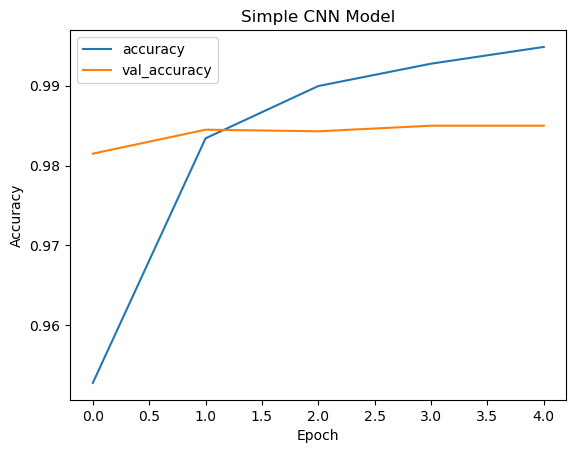

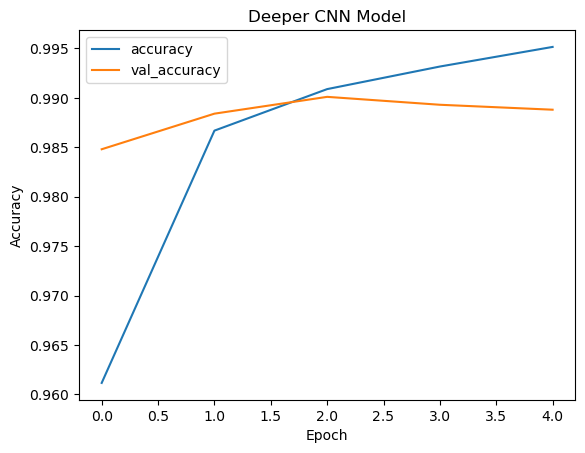

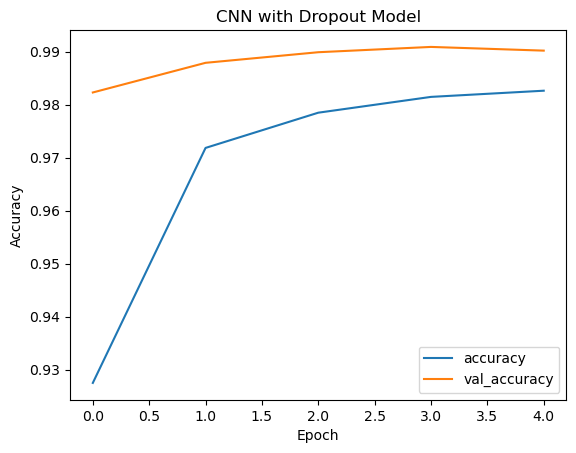

In [11]:
# Evaluate models
simple_model_score = simple_model.evaluate(x_test, y_test, verbose=0)
deeper_model_score = deeper_model.evaluate(x_test, y_test, verbose=0)
dropout_model_score = dropout_model.evaluate(x_test, y_test, verbose=0)

print(f'Simple CNN Model Accuracy: {simple_model_score[1]}')
print(f'Deeper CNN Model Accuracy: {deeper_model_score[1]}')
print(f'CNN with Dropout Model Accuracy: {dropout_model_score[1]}')

# Plot training history
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(simple_model_history, 'Simple CNN Model')
plot_history(deeper_model_history, 'Deeper CNN Model')
plot_history(dropout_model_history, 'CNN with Dropout Model')


In [16]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageDraw, ImageOps

class DigitRecognizerApp:
    def __init__(self, master):
        self.master = master
        master.title("Digit Recognizer")

        self.label = tk.Label(master, text="Handwritten Digit Recognition")
        self.label.pack()

        self.canvas = tk.Canvas(master, width=280, height=280, bg='white')
        self.canvas.pack()

        self.predict_button = tk.Button(master, text="Predict", command=self.predict_digit)
        self.predict_button.pack()

        self.clear_button = tk.Button(master, text="Clear", command=self.clear_canvas)
        self.clear_button.pack()

        self.result_label = tk.Label(master, text="", font=("Helvetica", 24))
        self.result_label.pack()

        self.canvas.bind("<B1-Motion>", self.paint)
        self.image = Image.new("L", (28, 28), color=0)
        self.draw = ImageDraw.Draw(self.image)

    def paint(self, event):
        x1, y1 = (event.x - 2), (event.y - 2)
        x2, y2 = (event.x + 2), (event.y + 2)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", width=10)
        self.draw.ellipse([x1, y1, x2, y2], fill="white")

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (28, 28), color=0)
        self.draw = ImageDraw.Draw(self.image)
        self.result_label.config(text="")

    def predict_digit(self):
        img = self.image.resize((28, 28))
        img = np.array(img).astype('float32') / 255.0
        img = img.reshape(1, 28, 28, 1)
        prediction = np.argmax(deeper_model.predict(img), axis=-1)
        self.result_label.config(text=str(prediction[0]))

root = tk.Tk()
app = DigitRecognizerApp(root)
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create and compile a model
def create_model(optimizer, loss, metrics):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],), name="H-Layer-1"),
        Dense(512, activation='relu', name="H-Layer-2"),
        Dense(1024, activation='relu', name="H-Layer-3"),
        Dense(y_train.shape[1], activation='softmax', name="O-Layer")
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

# Define different compilation parameters
compilation_params = [
    ('adam', 'categorical_crossentropy', ['accuracy']),
    ('sgd', 'binary_crossentropy', [tf.keras.metrics.Precision()]),
    ('rmsprop', 'mean_squared_error', [tf.keras.metrics.Recall()])
]

# Train and evaluate models with different compilation parameters
results = []
for optimizer, loss, metrics in compilation_params:
    print(f"Training model with optimizer={optimizer}, loss={loss}, metrics={metrics}")
    model = create_model(optimizer, loss, metrics)
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    result = model.evaluate(X_test, y_test, verbose=0)
    results.append((optimizer, loss, metrics, result))

# Print the results
for optimizer, loss, metrics, result in results:
    print(f"\nResults for optimizer={optimizer}, loss={loss}, metrics={metrics}")
    print(f"Test Loss: {result[0]}, Test Metric: {result[1]}")


Training model with optimizer=adam, loss=categorical_crossentropy, metrics=['accuracy']
Training model with optimizer=sgd, loss=binary_crossentropy, metrics=[<Precision name=precision_2>]
Training model with optimizer=rmsprop, loss=mean_squared_error, metrics=[<Recall name=recall_2>]

Results for optimizer=adam, loss=categorical_crossentropy, metrics=['accuracy']
Test Loss: 0.06228971108794212, Test Metric: 1.0

Results for optimizer=sgd, loss=binary_crossentropy, metrics=[<Precision name=precision_2>]
Test Loss: 0.39687278866767883, Test Metric: 0.875

Results for optimizer=rmsprop, loss=mean_squared_error, metrics=[<Recall name=recall_2>]
Test Loss: 0.016261262819170952, Test Metric: 0.9666666388511658


## Interpretation of Results
Adam with categorical_crossentropy and accuracy:

Adam: A popular optimizer that adapts the learning rate for each parameter, making it well-suited for a variety of problems.

Categorical Crossentropy: Appropriate for multi-class classification problems, providing a probabilistic interpretation of the model's predictions.

Accuracy: The fraction of correct predictions out of total predictions. High accuracy indicates good model performance on the test data.

Interpretation: This combination is generally effective for multi-class classification tasks like the Iris dataset, as it optimizes the loss effectively while providing a clear metric for performance evaluation

## SGD with binary_crossentropy and precision:

SGD (Stochastic Gradient Descent): A straightforward optimizer that updates parameters based on the gradient of the loss function. It might require careful tuning of the learning rate.

Binary Crossentropy: Typically used for binary classification tasks. Here, it's applied to a multi-class problem, which might not be optimal.

Precision: The ratio of true positive predictions to the sum of true and false positive predictions, indicating the model's accuracy in predicting positive instances.

Interpretation: Using binary_crossentropy for a multi-class classification might not be ideal. Precision as a metric focuses on the quality of positive predictions, which can be informative

for imbalanced datasets but might not fully capture the model's performance on balanced multi-class problems

## RMSprop with mean_squared_error and recall:

RMSprop: An optimizer that divides the learning rate by an exponentially decaying average of squared gradients, suitable for non-stationary objectives.

Mean Squared Error (MSE): Commonly used for regression tasks. Using MSE for classification can lead to suboptimal performance, as it doesn't align with the probabilistic nature of classification.

Recall: The ratio of true positive predictions to the sum of true positive and false negative predictions, measuring the model's ability to capture all positive instances.

Interpretation: Using MSE for classification is not appropriate, as it doesn't consider the probabilistic outputs typical in classification tasks. Recall provides insight into the model's completeness in capturing positive instances but might not reflect overall performance in multi-class classification.